# 11과 이변량분석 종합실습

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 1.숫자형 Y : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [3]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

In [72]:
adv='Advertising'

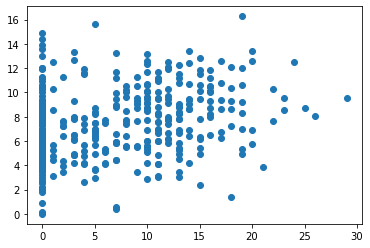

In [7]:
plt.scatter(x='Advertising',y='Sales', data = data)
plt.show()

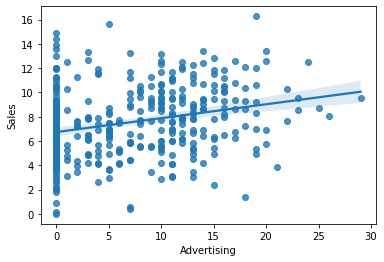

In [90]:
sns.regplot(x=adv, y=target, data = data)
plt.show()

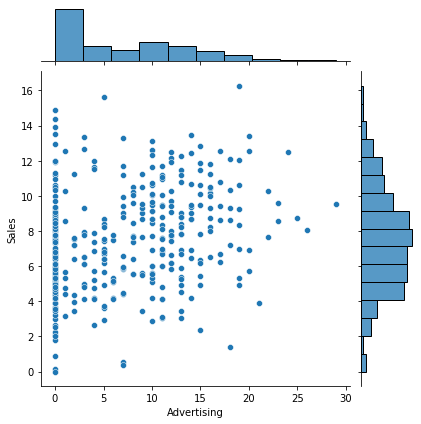

In [15]:
sns.jointplot(x='Advertising',y='Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [74]:
adv_pr = spst.pearsonr(data[adv],data[target])
adv_pr

(0.269506781376902, 4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

0.26 약간의 양의 상관관계는 있어보였으나 p-value가 5%보다 높아서 연관성이 없다고 판단.
0은 해외 광고를 하지 않는다고 판단.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

In [75]:
data['Population'].isna().sum()
pop = 'Population'

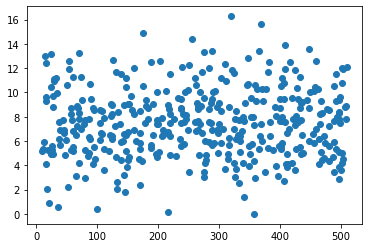

In [76]:
plt.scatter(x=pop,y=target, data=data)
plt.show()

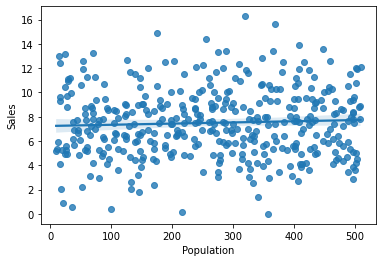

In [91]:
sns.regplot(x=pop, y=target, data = data)
plt.show()

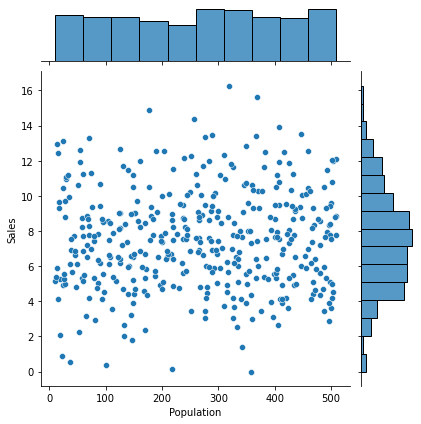

In [77]:
sns.jointplot(x=pop,y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [79]:
pop_pr = spst.pearsonr(data[pop],data[target])
pop_pr

(0.0504709844720392, 0.31398160931903)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

연관성이 없어보이나 p-value를 보는 5%이하면 어느 정도 연관이 있는 것이 아닌가?
근데 없다고 나옴
인구수가 많으면 판매량이 많은거 아닌가?

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

In [60]:
price='Price'

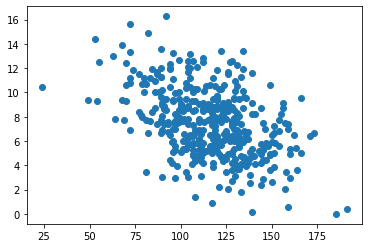

In [61]:
plt.scatter(x=price,y=target, data=data)
plt.show()

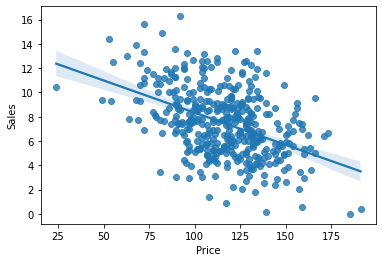

In [92]:
sns.regplot(x=price, y=target, data = data)
plt.show()

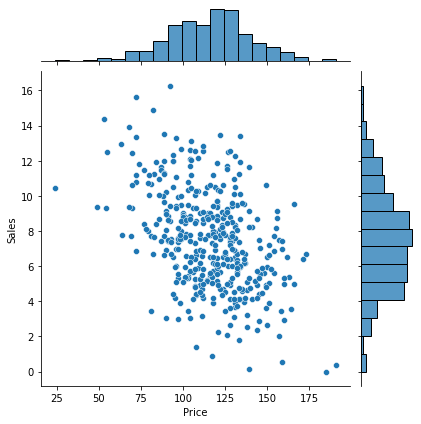

In [62]:
sns.jointplot(x=price,y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [80]:
pri_pr = spst.pearsonr(data[price],data[target])
pri_pr

(-0.4449507278465726, 7.61818701191294e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

가격과 판매는 약간 음의 상관관계가 있어보이나 연관성은 없어보인다

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

In [59]:
age='Age'

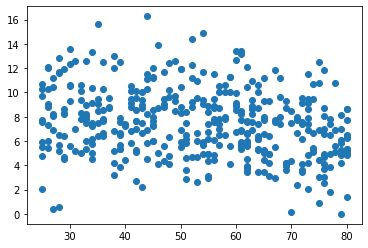

In [64]:
plt.scatter(x=age,y=target, data=data)
plt.show()

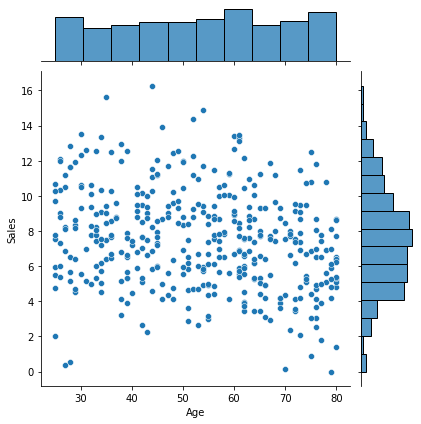

In [65]:
sns.jointplot(x=age,y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [81]:
age_pr = spst.pearsonr(data[age],data[target])
age_pr

(-0.2318154396045765, 2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

In [68]:
comp = 'CompPrice'

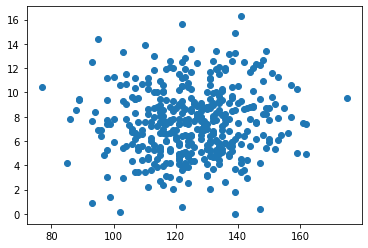

In [69]:
plt.scatter(x=comp,y=target, data=data)
plt.show()

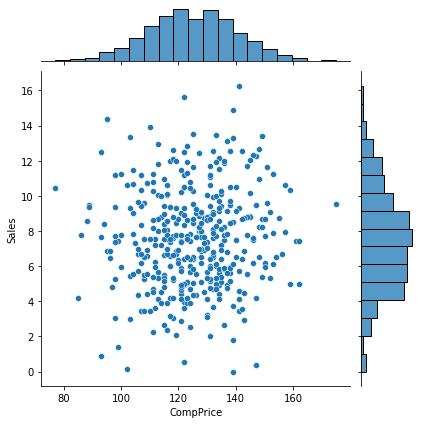

In [70]:
sns.jointplot(x=comp,y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [82]:
comp_pr = spst.pearsonr(data[comp],data[target])
comp_pr

(0.06407872955062152, 0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

경쟁사와 판매량은 연관없음.. 구매할때 카시트는 다 거기서 거기인가 

In [93]:
data['Price_diff'] =  data['CompPrice'] - data['Price']

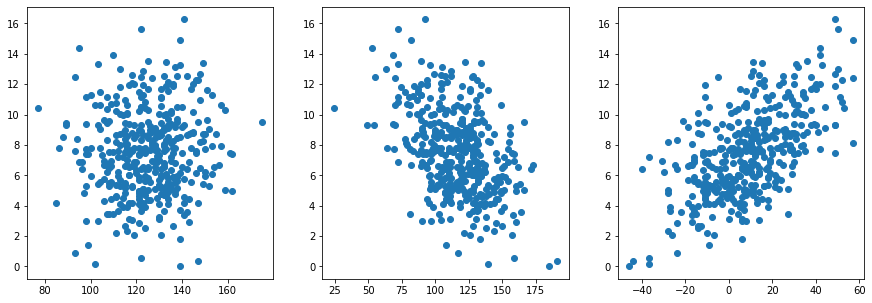

In [96]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(x='CompPrice',y=target, data=data)


plt.subplot(1,3,2)
plt.scatter(x='Price',y=target, data=data)


plt.subplot(1,3,3)
plt.scatter(x='Price_diff',y=target, data=data)
plt.show()

In [97]:
spst.pearsonr(data['Price_diff'],data[target])

(0.5979217124533921, 3.877120641788835e-40)

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

In [26]:
feature = 'ShelveLoc'
data[feature].isna().sum()

0

In [47]:
bad = data.loc[data[feature] == 'Bad',target]
good = data.loc[data[feature] == 'Good',target]
medium = data.loc[data[feature] == 'Medium',target]

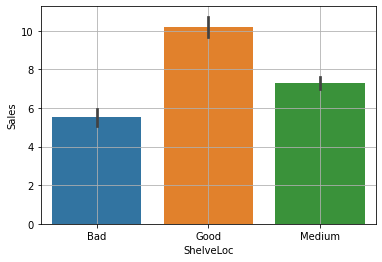

In [42]:
sns.barplot(x=feature,y=target,data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [48]:
spst.f_oneway(bad,good,medium)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

In [52]:
feature = 'US'
yes = data.loc[data[feature] == 'Yes', target]
no =  data.loc[data[feature] == 'No', target]

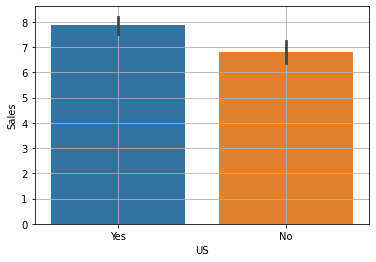

In [54]:
sns.barplot(x=feature,y=target,data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [84]:
us_pr = spst.ttest_ind(yes,no)
us_pr

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) 관계 정리하기

① 강한관계

In [89]:
shelve, price_diff

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

② 중간관계

In [ ]:
us, price, age, advertising

③ 관계없음

In [ ]:
comprice, population

In [98]:
boston = pd.read_csv('https://bit.ly/3PArw4W')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [101]:
tax = spst.pearsonr(boston['tax'],boston['medv'])
round(tax[0],3)

-0.469

# 2.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [2]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [9]:
age = 'Age'

1) 그래프 : histogram, densityplot

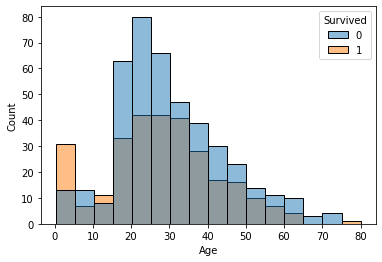

In [10]:
sns.histplot(data = titanic, x = age, bins = 16, hue=target)
plt.show()

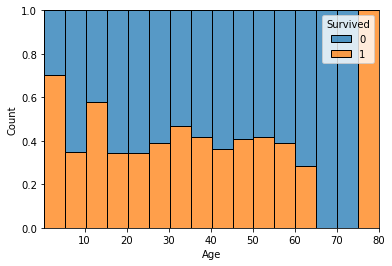

In [14]:
sns.histplot(data = titanic, x=age, bins = 16, hue=target, multiple = 'fill')
plt.show()

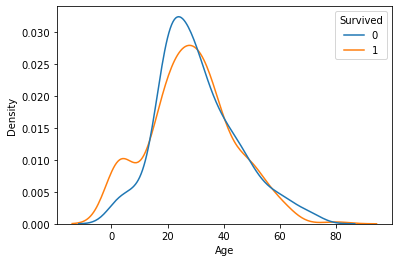

In [13]:
sns.kdeplot(data = titanic, x=age, hue=target, common_norm = False)
plt.show()

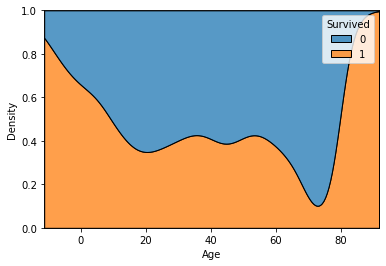

In [15]:
sns.kdeplot(x=age, data=titanic, hue=target, multiple='fill')
plt.show()

2) 수치화 : 로지스틱회귀

In [18]:
import statsmodels.api as sm

In [67]:
age_v = titanic.loc[titanic[age].notnull(), age]
age_v

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [26]:
titanic[target].unique()

array([0, 1], dtype=int64)

In [ ]:
model=sm.Logit(titanic[target], age_v)
result=model.fit()
print(result.pvalues)

3) 관계 평가하기

In [ ]:
나이에 따른 생존자는 연관성이 없어 보인다.

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

In [30]:
fare = 'Fare'

1) 그래프 : histogram, densityplot

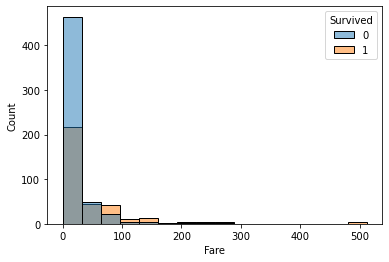

In [31]:
sns.histplot(data=titanic, x=fare, bins=16, hue=target)
plt.show()

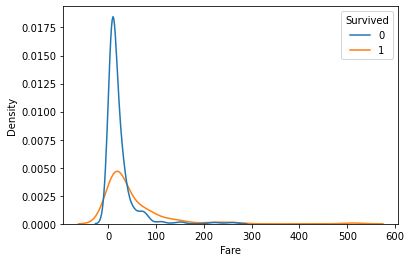

In [32]:
sns.kdeplot(data=titanic, x=fare, hue=target)
plt.show()

2) 수치화 : 로지스틱회귀

In [33]:
titanic[fare].isna().sum()

0

In [35]:
model=sm.Logit(titanic[target], titanic[fare])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

In [ ]:
운임이 100이하에 승객이 많이 분포하며 사망자 많다.
운임에 따른 생존자는 관련이 없어보임

4) 추가 분석할 내용 정리

In [ ]:
운임이 100이하인곳에 사람이들의 비율이 많은 이유

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

In [36]:
sex = 'Sex'

1) 교차표(pd.crosstab())

In [43]:
table = pd.crosstab(titanic[sex],titanic[target], normalize = 'index')
table

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


2) 시각화( Stacked Bar, Mosaic)

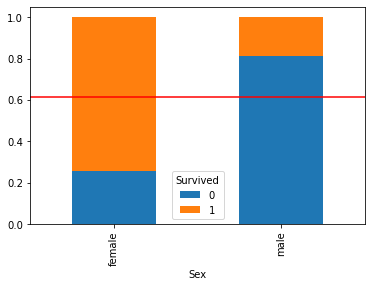

In [44]:
table.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

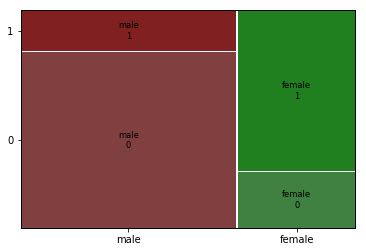

In [42]:
mosaic(titanic, [sex,target])
plt.show()

3) 가설검정(카이제곱검정)

In [40]:
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n', result[2])

카이제곰통계량 260.71702016732104
p-value 1.1973570627755645e-58
기대빈도
 1


4) 관계 평가하기

In [ ]:
여성의 생존자가 많은 것으로 보아 침몰 시 여성, 아이를 구명보트에 먼저 태웠다고 함. 도메인지식


5) 추가 분석하기

#### ② Pclass --> Survived

In [47]:
pclass = 'Pclass'

1) 교차표(pd.crosstab())

In [49]:
table2 = pd.crosstab(titanic[pclass], titanic[target], normalize='index')
table2

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


2) 시각화( Stacked Bar, Mosaic)

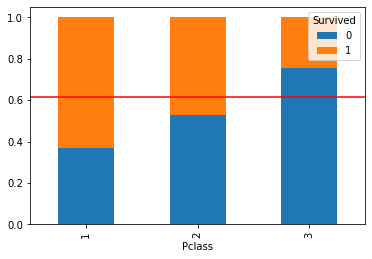

In [50]:
table2.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

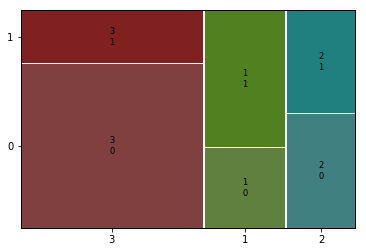

In [52]:
mosaic(titanic,[pclass, target])
plt.show()

3) 가설검정(카이제곱검정)

In [53]:
result = spst.chi2_contingency(table2)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n', result[2])

카이제곰통계량 0.3068530159592021
p-value 0.8577638006771973
기대빈도
 2


4) 관계 평가하기

In [ ]:
클래스 별로 차이가 보인다.
3클래스는 가장 승객수 가 많고 사망자도 많아 보인다.

5) 추가 분석하기

In [ ]:
1클래스가 사고 당시 구명보트를 탈수있는 우선권이 존재 하였는지

#### ③ Embarked --> Survived

In [55]:
embark = 'Embarked'

1) 교차표(pd.crosstab())

In [59]:
table3 = pd.crosstab(titanic[target],titanic[embark], normalize='index')
table3

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.273529,0.088235,0.638235


2) 시각화( Stacked Bar, Mosaic)

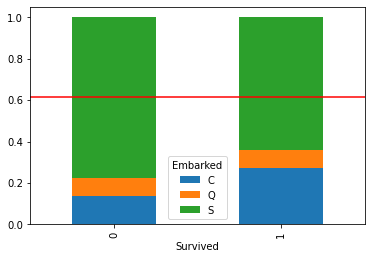

In [60]:
table3.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

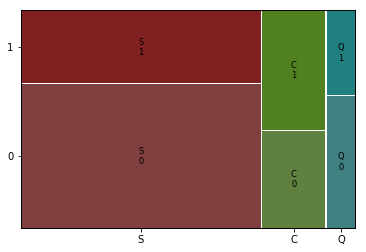

In [61]:
mosaic(titanic,[embark, target])
plt.show()

3) 가설검정(카이제곱검정)

In [62]:
result = spst.chi2_contingency(table3)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n', result[2])

카이제곱통계량 0.05949808936027391
p-value 0.9706891025789832
기대빈도
 2


4) 관계 평가하기

In [ ]:
S행선지 인원이 많으며 사망자도 많다. Q는 비슷, C는 생존자가 좀더 많다

5) 추가 분석하기

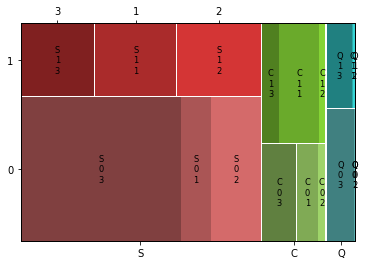

In [63]:
mosaic(titanic,[embark, target, pclass])
plt.show()

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음